### Ridgeline plot XAS

### X-ray absorption spectra calculated using PNO-DFT/ROCIS zora

In [3]:
# getting necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

In [5]:
# getting the data

In [6]:
#Defining name for variables in the folder (outputs and inputs)
file=""
post=".csv"
suff="fy_"

In [7]:
#Defining variables
l_tmp = [85, 90, 95, 100, 105, 110]
list_suf = [i for i in range(25,81)]
for i in l_tmp:
    list_suf.append(i)

In [8]:
list_suf_resume = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,\
                   40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]

#### Calling output files

In [9]:
for ii in list_suf:
    globals()['%s' % suff+str(ii)] = pd.read_csv(file+'AB_'+str(ii/10)+'A'+post, delimiter=',')
    globals()['%s' % suff+str(ii)].columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']

In [10]:
suff_num = 45
globals()['%s' % suff+str(suff_num)]

,Energy,Intensity,dx,dy,dz
0,288.02,0.0,0.0,0.0,0.0
1,288.04,0.0,0.0,0.0,0.0
2,288.06,0.0,0.0,0.0,0.0
3,288.08,0.0,0.0,0.0,0.0
4,288.10,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2994,348.92,0.0,0.0,0.0,0.0
2995,348.94,0.0,0.0,0.0,0.0
2996,348.96,0.0,0.0,0.0,0.0
2997,348.98,0.0,0.0,0.0,0.0


_________________________

### Plotting XAS

In [11]:
# uncomment to check the list or parameters of the plot
#plt.rcParams.keys()

In [12]:
plt.rcParams['axes.labelsize'] = 26
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['font.size'] = 18

In [19]:
pal = sns.color_palette(palette='coolwarm', n_colors=62)

In [20]:
pal

[(0.24809121780392157, 0.3260130233176471, 0.7776686513529412),
 (0.26638146835294113, 0.35330440842352945, 0.8016373194980392),
 (0.28527277752941177, 0.38012942263529415, 0.8234685512470589),
 (0.3041742870039216, 0.40694488283921565, 0.8452627266980393),
 (0.32371841525490197, 0.4331584405490196, 0.864722355372549),
 (0.34327752343529416, 0.45935363472941176, 0.8841219216235294),
 (0.3634607953411765, 0.4847836818509804, 0.9010188868941177),
 (0.383662065772549, 0.5101834172862746, 0.9178306732313726),
 (0.4044212904941176, 0.5346434904470588, 0.9320019126352941),
 (0.42519897019607844, 0.559058179764706, 0.9460614570784314),
 (0.4464306424156863, 0.5823564265411765, 0.9573733054862745),
 (0.46767809468235294, 0.6055912316235293, 0.9685462810941176),
 (0.48924640790588236, 0.6275360555921569, 0.9768955097686275),
 (0.5108243242509803, 0.6493966148235294, 0.9850787763764707),
 (0.5325682374117646, 0.6698005978823529, 0.9903932701176471),
 (0.5597467255686274, 0.6947677280784313, 0.9960753091764706),
 (0.5814861481882353, 0.7134505955294117, 0.9983143529411764),
 (0.603162067917647, 0.7315274773529412, 0.9995652785372549),
 (0.6247032376117647, 0.7483184872352941, 0.9987194655803922),
 (0.6461128107647058, 0.7644364965294117, 0.9968684625058823),
 (0.6672529243333334, 0.7791764569999999, 0.992959213),
 (0.6881884831921569, 0.7931783792980391, 0.9880381043568628),
 (0.7087196897176471, 0.8057213889294117, 0.9811168090470588),
 (0.7289695795686274, 0.8174641357058824, 0.973187668372549),
 (0.7486824103137254, 0.8276791079411765, 0.9633344592745098),
 (0.7680343643529411, 0.8370352195294117, 0.9524882182352941),
 (0.7867207013568628, 0.8448072103686275, 0.9398103849490196),
 (0.8049647588235295, 0.8516661605568627, 0.9261650744313725),
 (0.8224204049411765, 0.8568975165411765, 0.9107951305882354),
 (0.839351442772549, 0.861166825654902, 0.8944937634156863),
 (0.8553783684509804, 0.8637781390980391, 0.8765871773137255),
 (0.8755573874313726, 0.860242158862745, 0.8514300660980393),
 (0.8918168921215687, 0.8519732770431372, 0.829085274254902),
 (0.9061541340352941, 0.8420910651764706, 0.8061505930823529),
 (0.9193759889058823, 0.8312727235294118, 0.7828736304470588),
 (0.9306685963333333, 0.818876999654902, 0.7591463906980392),
 (0.940878943, 0.8055964028235294, 0.7351665564705883),
 (0.9491505082901961, 0.7907852690666667, 0.7108755943019608),
 (0.9563709270509804, 0.7751443261333334, 0.6864159483098039),
 (0.9616447383764706, 0.7580291825411765, 0.6617823791647058),
 (0.9658988981882353, 0.7401418386039216, 0.6370577074156862),
 (0.968203399, 0.7208441, 0.6122929913333334),
 (0.9695216017294117, 0.7008328676235294, 0.5875080175294117),
 (0.9688941583333334, 0.679479563427451, 0.5628122911529412),
 (0.9673165156666667, 0.6574708288078431, 0.5381601507294118),
 (0.963806056435294, 0.6341884145294118, 0.5137208491529413),
 (0.9593847296274509, 0.6103057604117648, 0.4893818509411765),
 (0.951253794882353, 0.5787993895882353, 0.4594078057647059),
 (0.9440545734235294, 0.5531534787490197, 0.4355484903137255),
 (0.9343054549058823, 0.525917511654902, 0.4122864740431373),
 (0.9244088216823529, 0.49858955783529413, 0.38905901227058826),
 (0.9120325752980393, 0.469679582172549, 0.36656490445882356),
 (0.8995343807254902, 0.4406918021568627, 0.34410686323529416),
 (0.8846434386941177, 0.41001709788235297, 0.32250654924705885),
 (0.8696552305058823, 0.37927381945098043, 0.30094110221960785),
 (0.8523781350078431, 0.34649194649411763, 0.2803464686980392),
 (0.8350272044352941, 0.3136443124235294, 0.25978315174117644),
 (0.8155083866078432, 0.2777809871764706, 0.24029356566666665),
 (0.7959375394862745, 0.24184528534117647, 0.22082974913333334),
 (0.7743368501529412, 0.19975926804705882, 0.2025345544352941),
 (0.7527039411019608, 0.1575756266980392, 0.1842579092901961),
 (0.7291959318352941, 0.08667893684705881, 0.16724040340392157)]

In [21]:
# getting the data

temp = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2016-weather-data-seattle.csv') # we retrieve the data from plotly's GitHub repository
temp['month'] = pd.to_datetime(temp['Date']).dt.month # we store the month in a separate column

# we define a dictionnary with months that we'll use later
month_dict = {1: 'january',
              2: 'february',
              3: 'march',
              4: 'april',
              5: 'may',
              6: 'june',
              7: 'july',
              8: 'august',
              9: 'september',
              10: 'october',
              11: 'november',
              12: 'december'}

# we create a 'month' column
temp['month'] = temp['month'].map(month_dict)

# we generate a pd.Serie with the mean temperature for each month (used later for colors in the FacetGrid plot), and we create a new column in temp dataframe
month_mean_serie = temp.groupby('month')['Mean_TemperatureC'].mean()
temp['mean_month'] = temp['month'].map(month_mean_serie)

In [22]:
temp

,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,month,mean_month
0,1/1/1948,10,8.0,7.0,january,4.493982
1,1/2/1948,6,4.0,3.0,january,4.493982
2,1/3/1948,7,4.0,2.0,january,4.493982
3,1/4/1948,7,4.0,2.0,january,4.493982
4,1/5/1948,7,3.0,0.0,january,4.493982
...,...,...,...,...,...,...
24376,12/27/2015,4,3.0,2.0,december,4.856042
24377,12/28/2015,5,3.0,2.0,december,4.856042
24378,12/29/2015,7,4.0,1.0,december,4.856042
24379,12/30/2015,6,2.0,-1.0,december,4.856042


/home/mahecha/miniconda3/envs/dataviz/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mahecha/miniconda3/envs/dataviz/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mahecha/miniconda3/envs/dataviz/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mahecha/miniconda3/envs/dataviz/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

/home/mahecha/miniconda3/envs/dataviz/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mahecha/miniconda3/envs/dataviz/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahecha/miniconda3/envs/dataviz/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mahecha/miniconda3/envs/dataviz/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

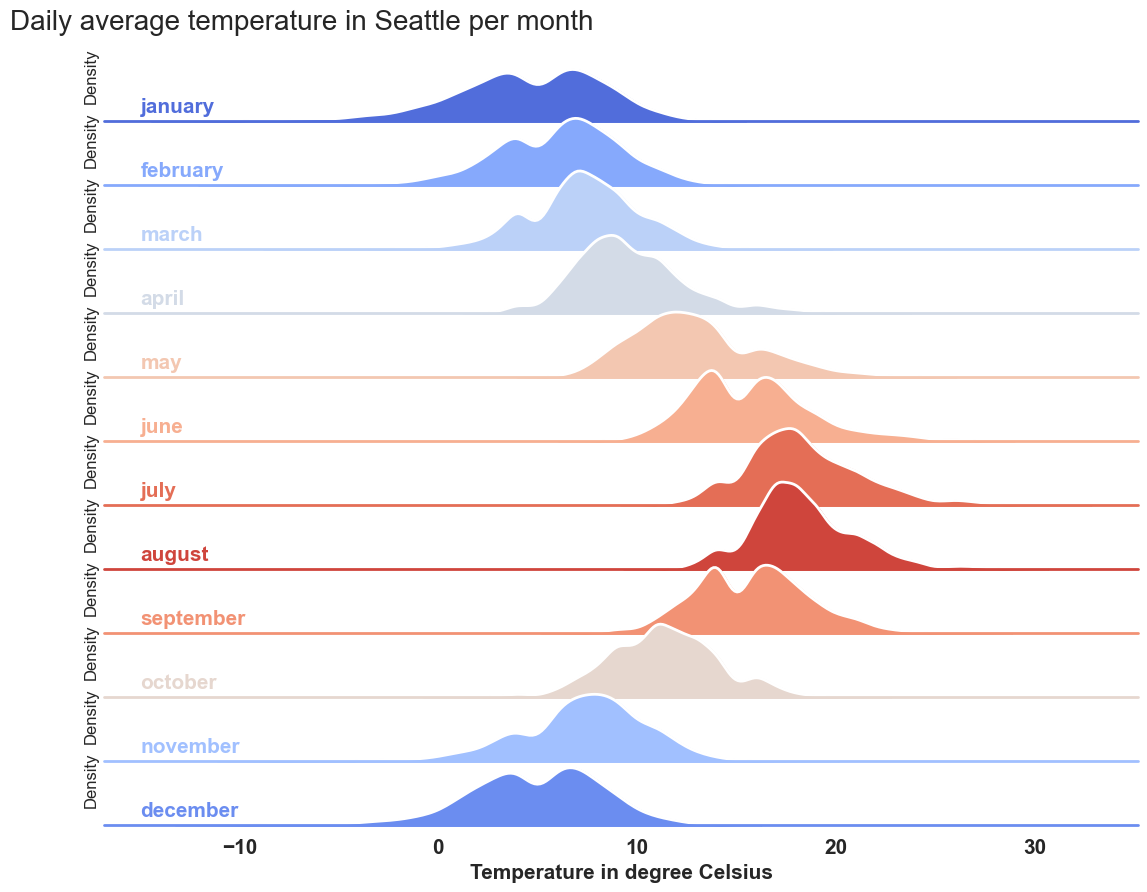

In [2]:
# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='coolwarm', n_colors=12)

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(temp, row='month', hue='mean_month', aspect=15, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'Mean_TemperatureC',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'Mean_TemperatureC', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.text(-15, 0.02, month_dict[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.3)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Temperature in degree Celsius', fontweight='bold', fontsize=15)
g.fig.suptitle('Daily average temperature in Seattle per month',
               ha='right',
               fontsize=20,
               fontweight=20)

plt.show()

/home/mahecha/miniconda3/envs/dataviz/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mahecha/miniconda3/envs/dataviz/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mahecha/miniconda3/envs/dataviz/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mahecha/miniconda3/envs/dataviz/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes

/home/mahecha/miniconda3/envs/dataviz/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mahecha/miniconda3/envs/dataviz/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mahecha/miniconda3/envs/dataviz/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mahecha/miniconda3/envs/dataviz/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

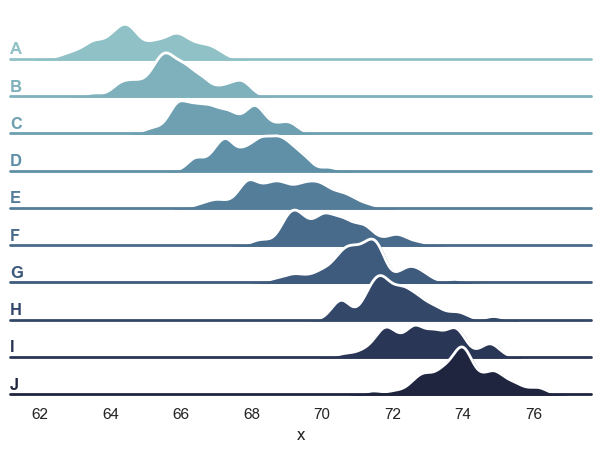

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)